# **Analisis Market - Bussines Analyst**

#### Import Data

In [1]:
import pandas as pd
import numpy as np
import re

In [ ]:
df = pd.read_csv('Data_Hasil_Scrapping.csv')
df.head(5)

,Halaman,Nama Produk,Harga,Label Produk,Jenis Penyedia,Lokasi,Vendor,Jumlah Terjual,Kategori,Status Produk,URL
0,1,LAMPU PENERANGAN JALAN UMUM,"Rp 13.737.364,00",PDN,UMKK,Kota Adm. Jakarta Barat,NaN,Terjual 0,Barang,Aktif,https://katalog.inaproc.id/solusi-klik-cerdas-...
1,1,LAMPU PENERANGAN JALAN UMUM,"Rp 13.737.364,00",PDN,UMKK,Kota Tangerang,NaN,Terjual 0,Barang,Aktif,https://katalog.inaproc.id/cv-mulia-berkahtama...
2,1,LAMPU PENERANGAN JALAN UMUM,"Rp 13.737.364,00",PDN,UMKK,Kota Tangerang,NaN,Terjual 0,Barang,Aktif,https://katalog.inaproc.id/solusi-klik/lampu-p...
3,1,LAMPU PENERANGAN JALAN UMUM,"Rp 13.737.364,00",PDN,UMKK,Kota Balikpapan,NaN,Terjual 0,Barang,Aktif,https://katalog.inaproc.id/solusi-klik-tanjung...
4,1,LAMPU PENERANGAN JALAN UMUM,"Rp 13.737.364,00",PDN,UMKK,Kab. Bandung,NaN,Terjual 0,Barang,Aktif,https://katalog.inaproc.id/solusi-klik-global/...


#### PREPROCESSING

> Kolom Jumlah Terjual

In [3]:
def clean_sold(sold_str):
    """Mengubah 'Belum Terjual' menjadi 0 dan membersihkan string lainnya."""
    if pd.isna(sold_str) or str(sold_str).lower() in ['belum terjual', '0']:
        return 0
    cleaned = ''.join(filter(str.isdigit, str(sold_str)))
    try:
        return int(cleaned)
    except ValueError:
        return 0
df['Jumlah_Terjual'] = df['Jumlah Terjual'].apply(clean_sold)

df['Lokasi'] = df['Lokasi'].str.strip()

> Format Harga

In [4]:
def clean_price_combined(price_str):
    if pd.isna(price_str) or not isinstance(price_str, str):
        return np.nan
    s = price_str.strip().replace('Rp', '').lower()
    if ' - ' in s or 'jt' in s:
        parts = re.split(r'\s*-\s*', s)
        def convert_to_value(text):
            text = text.strip()
            multiplier = 1.0

            if 'jt' in text:
                multiplier = 1_000_000
                text = text.replace('jt', '').replace(',', '.')

            text = re.sub(r'[^\d.]', '', text)

            try:
                if not text:
                    return np.nan
                return float(text) * multiplier
            except ValueError:
                return np.nan

        min_val = convert_to_value(parts[0])
        max_val = convert_to_value(parts[1]) if len(parts) > 1 else min_val

        if pd.isna(min_val) or pd.isna(max_val):
            return np.nan

        return (min_val + max_val) / 2
    else:
        cleaned = s.replace('.', '').replace(',', '.')
        try:
            return float(cleaned)
        except ValueError:
            return np.nan
df['Harga'] = df['Harga'].apply(clean_price_combined)
print("✅ Kolom 'Harga' telah dibersihkan untuk format nilai tunggal dan range.")

✅ Kolom 'Harga' telah dibersihkan untuk format nilai tunggal dan range.


> Jumlah Terjual

In [5]:
def clean_sold(sold_str):
    if pd.isna(sold_str) or str(sold_str).lower() in ['belum terjual', '0']:
        return 0
    cleaned = ''.join(filter(str.isdigit, str(sold_str)))
    try:
        return int(cleaned)
    except ValueError:
        return 0
df['Jumlah_Terjual'] = df['Jumlah Terjual'].apply(clean_sold)
df['Lokasi'] = df['Lokasi'].str.strip()
print("--- Preprocessing Selesai. Data Numerik & Fitur Baru Tersedia. ---")

--- Preprocessing Selesai. Data Numerik & Fitur Baru Tersedia. ---


In [6]:
df['Jumlah Terjual'] = (
    df['Jumlah Terjual']
    .astype(str)                          # pastikan tipe string
    .str.replace('Terjual', '', regex=False)  # buang kata 'Terjual'
    .str.replace('[^0-9]', '', regex=True)    # buang karakter non-angka
    .replace('', 0)                          # kalau kosong jadikan 0
    .astype(int)                             # ubah ke integer
)

In [7]:
df['Jumlah Terjual'] = df['Jumlah Terjual'] / 100

In [8]:
import pandas as pd

# --- Hitung jumlah baris awal ---
initial_rows = len(df)

# --- Pisahkan data ---
df_cleaned = df[df['Jumlah Terjual'] > 0].copy()   # terjual
df_tt = df[df['Jumlah Terjual'] == 0].copy()       # tidak terjual

# --- Hitung jumlah baris akhir dan yang dihapus ---
final_rows = len(df_cleaned)
rows_dropped = len(df_tt)

# --- Informasi ringkas ---
print("✅ Data berhasil dipisahkan.")
print(f"Jumlah baris awal: {initial_rows}")
print(f"Jumlah baris tidak terjual (Jumlah Terjual = 0): {rows_dropped}")
print(f"Jumlah baris terjual (Jumlah Terjual > 0): {final_rows}")

# --- Opsional: tampilkan 5 data awal masing-masing ---
print("\n📦 Contoh data TERJUAL:")
print(df_cleaned.head())

print("\n❌ Contoh data TIDAK TERJUAL:")
print(df_tt.head())


✅ Data berhasil dipisahkan.
Jumlah baris awal: 2650
Jumlah baris tidak terjual (Jumlah Terjual = 0): 2590
Jumlah baris terjual (Jumlah Terjual > 0): 60

📦 Contoh data TERJUAL:
     Halaman                                    Nama Produk       Harga  \
9          1                    LAMPU PENERANGAN JALAN UMUM  13875000.0   
79         2    PHILIPS LAMPU LED PENERANGAN JALAN UMUM 60W   5150000.0   
93         2  Lampu Penerangan Jalan Umum (LPJU) Solar Cell  38250600.0   
107        2             Pemeliharaan Penerangan Jalan Umum   1900000.0   
112        2                    LAMPU PENERANGAN JALAN UMUM   7616000.0   

    Label Produk Jenis Penyedia                   Lokasi  Vendor  \
9            PDN           UMKK      Kota Tanjung Pinang     NaN   
79           PDN           UMKK            Kota Surabaya     NaN   
93           PDN           UMKK               Kota Medan     NaN   
107          PDN           UMKK               Kab. Bogor     NaN   
112          PDN           UMKK  

> Hasil Clean

In [9]:
df_tt
df_cleaned
df

,Halaman,Nama Produk,Harga,Label Produk,Jenis Penyedia,Lokasi,Vendor,Jumlah Terjual,Kategori,Status Produk,URL,Jumlah_Terjual
0,1,LAMPU PENERANGAN JALAN UMUM,13737364.0,PDN,UMKK,Kota Adm. Jakarta Barat,NaN,0.0,Barang,Aktif,https://katalog.inaproc.id/solusi-klik-cerdas-...,0
1,1,LAMPU PENERANGAN JALAN UMUM,13737364.0,PDN,UMKK,Kota Tangerang,NaN,0.0,Barang,Aktif,https://katalog.inaproc.id/cv-mulia-berkahtama...,0
2,1,LAMPU PENERANGAN JALAN UMUM,13737364.0,PDN,UMKK,Kota Tangerang,NaN,0.0,Barang,Aktif,https://katalog.inaproc.id/solusi-klik/lampu-p...,0
3,1,LAMPU PENERANGAN JALAN UMUM,13737364.0,PDN,UMKK,Kota Balikpapan,NaN,0.0,Barang,Aktif,https://katalog.inaproc.id/solusi-klik-tanjung...,0
4,1,LAMPU PENERANGAN JALAN UMUM,13737364.0,PDN,UMKK,Kab. Bandung,NaN,0.0,Barang,Aktif,https://katalog.inaproc.id/solusi-klik-global/...,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2645,45,Jasa Instalasi Jaringan Kabel 2x10 mm2 Peneran...,0.0,PDN,UMKK,Kota Bekasi,NaN,0.0,Barang,Belum Aktif,https://katalog.inaproc.id/trica-daya/jasa-ins...,0
2646,45,Jasa Instalasi Jaringan Kabel NFA2X 4x16 mm2 P...,0.0,PDN,UMKK,Kota Bekasi,NaN,0.0,Barang,Belum Aktif,https://katalog.inaproc.id/trica-daya/jasa-ins...,0
2647,45,"LAMPU PENERANGAN JALAN UMUM DAYA INPUT 150W, L...",0.0,PDN,UMKK,Kota Tangerang,NaN,0.0,Barang,Belum Aktif,https://katalog.inaproc.id/cv-rehobot-sukses-m...,0
2648,45,Jasa Instalasi Jaringan Kabel NFA2X 2x16 mm2 P...,0.0,PDN,UMKK,Kota Bekasi,NaN,0.0,Barang,Belum Aktif,https://katalog.inaproc.id/trica-daya/jasa-ins...,0


#### VISUALISASI

In [10]:
df_tt
df_cleaned
df

,Halaman,Nama Produk,Harga,Label Produk,Jenis Penyedia,Lokasi,Vendor,Jumlah Terjual,Kategori,Status Produk,URL,Jumlah_Terjual
0,1,LAMPU PENERANGAN JALAN UMUM,13737364.0,PDN,UMKK,Kota Adm. Jakarta Barat,NaN,0.0,Barang,Aktif,https://katalog.inaproc.id/solusi-klik-cerdas-...,0
1,1,LAMPU PENERANGAN JALAN UMUM,13737364.0,PDN,UMKK,Kota Tangerang,NaN,0.0,Barang,Aktif,https://katalog.inaproc.id/cv-mulia-berkahtama...,0
2,1,LAMPU PENERANGAN JALAN UMUM,13737364.0,PDN,UMKK,Kota Tangerang,NaN,0.0,Barang,Aktif,https://katalog.inaproc.id/solusi-klik/lampu-p...,0
3,1,LAMPU PENERANGAN JALAN UMUM,13737364.0,PDN,UMKK,Kota Balikpapan,NaN,0.0,Barang,Aktif,https://katalog.inaproc.id/solusi-klik-tanjung...,0
4,1,LAMPU PENERANGAN JALAN UMUM,13737364.0,PDN,UMKK,Kab. Bandung,NaN,0.0,Barang,Aktif,https://katalog.inaproc.id/solusi-klik-global/...,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2645,45,Jasa Instalasi Jaringan Kabel 2x10 mm2 Peneran...,0.0,PDN,UMKK,Kota Bekasi,NaN,0.0,Barang,Belum Aktif,https://katalog.inaproc.id/trica-daya/jasa-ins...,0
2646,45,Jasa Instalasi Jaringan Kabel NFA2X 4x16 mm2 P...,0.0,PDN,UMKK,Kota Bekasi,NaN,0.0,Barang,Belum Aktif,https://katalog.inaproc.id/trica-daya/jasa-ins...,0
2647,45,"LAMPU PENERANGAN JALAN UMUM DAYA INPUT 150W, L...",0.0,PDN,UMKK,Kota Tangerang,NaN,0.0,Barang,Belum Aktif,https://katalog.inaproc.id/cv-rehobot-sukses-m...,0
2648,45,Jasa Instalasi Jaringan Kabel NFA2X 2x16 mm2 P...,0.0,PDN,UMKK,Kota Bekasi,NaN,0.0,Barang,Belum Aktif,https://katalog.inaproc.id/trica-daya/jasa-ins...,0


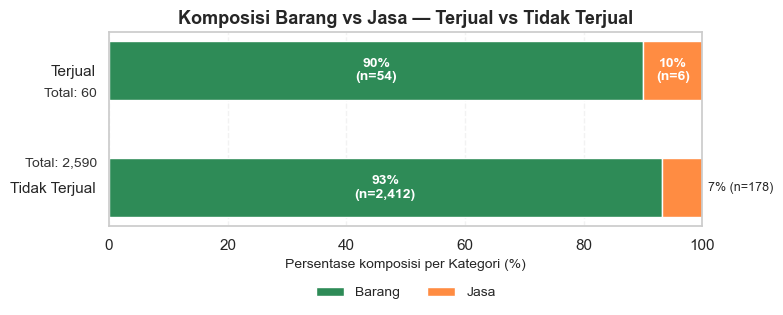

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

proc_col = "Kategori" if "Kategori" in df.columns else ("Kategori Produk (pred)" if "Kategori Produk (pred)" in df.columns else None)
if proc_col is None:
    raise KeyError("Kolom 'Kategori' atau 'Kategori Produk (pred)' tidak ditemukan di df. Jalankan proses kategorisasi dulu.")

def simplify_cat(x):
    if not isinstance(x, str):
        return None
    x = x.lower()
    if any(k in x for k in ["barang", "lampu", "tiang", "panel", "pju", "lampu penerangan", "penerangan jalan"]):
        return "Barang"
    if any(k in x for k in ["jasa", "pemelihara", "perawatan", "pemasangan", "instalasi", "pekerjaan"]):
        return "Jasa"
    return None

df = df.copy()
df["_KategoriSimple"] = df[proc_col].astype(str).apply(simplify_cat)

terjual_df = df[df["Jumlah Terjual"] > 0]
tidak_df   = df[df["Jumlah Terjual"] == 0]

def compute_pct_no_lain(subdf):
    counts = subdf["_KategoriSimple"].value_counts(dropna=True)
    barang = counts.get("Barang", 0)
    jasa   = counts.get("Jasa", 0)
    total = barang + jasa
    if total == 0:
        return {"Barang": 0.0, "Jasa": 0.0}, {"Barang": 0, "Jasa": 0}
    pct = {"Barang": barang / total * 100, "Jasa": jasa / total * 100}
    abs_counts = {"Barang": int(barang), "Jasa": int(jasa)}
    return pct, abs_counts

terjual_pct, terjual_cnt = compute_pct_no_lain(terjual_df)
tidak_pct, tidak_cnt   = compute_pct_no_lain(tidak_df)

labels = ["Terjual", "Tidak Terjual"]
bar_pcts = [
    [terjual_pct["Barang"], terjual_pct["Jasa"]],
    [tidak_pct["Barang"], tidak_pct["Jasa"]],
]
bar_cnts = [
    [terjual_cnt["Barang"], terjual_cnt["Jasa"]],
    [tidak_cnt["Barang"], tidak_cnt["Jasa"]],
]

colors = {"Barang": "#2E8B57", "Jasa": "#FF8C42"}
cats = ["Barang", "Jasa"]

fig, ax = plt.subplots(figsize=(8, 3.5))
y = np.arange(len(labels))
height = 0.5

left = np.zeros(len(labels))
for i, cat in enumerate(cats):
    vals = [row[i] for row in bar_pcts]
    ax.barh(y, vals, left=left, height=height, color=colors[cat], label=cat, edgecolor="white")
    for row_idx, (v, l, cnt) in enumerate(zip(vals, left, [row[i] for row in bar_cnts])):
        if v > 0:
            if v >= 8:
                ax.text(l + v/2, y[row_idx], f"{v:.0f}%\n(n={cnt:,})", ha='center', va='center', color='white', fontsize=10, fontweight='semibold')
            else:
                ax.text(l + v + 1, y[row_idx], f"{v:.0f}% (n={cnt:,})", ha='left', va='center', fontsize=9)
    left += vals

# formatting
ax.set_yticks(y)
ax.set_yticklabels(labels, fontsize=11)
ax.set_xlim(0, 100)
ax.set_xlabel("Persentase komposisi per Kategori (%)", fontsize=10)
ax.set_title("Komposisi Barang vs Jasa — Terjual vs Tidak Terjual", fontsize=13, weight='bold')
ax.invert_yaxis()
ax.grid(axis='x', linestyle='--', alpha=0.25)
ax.legend(title="", loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=2, frameon=False, fontsize=10)

# --- place totals cleanly to the left using axes-fraction coordinates ---
# choose vertical fractions to align with each bar (top-to-bottom)
n_bars = len(labels)
y_fracs = np.linspace(0.68, 0.32, n_bars)  # tweak if you change figure size
for i, lbl in enumerate(labels):
    total_rows = sum(bar_cnts[i])
    txt = f"Total: {total_rows:,}"
    # x = -0.02 in axes fraction places a bit left of the axes (negative to be outside)
    ax.text(-0.02, y_fracs[i], txt, transform=ax.transAxes, va='center', ha='right', fontsize=10, color="#333")

plt.tight_layout()
plt.show()


> Terjual vs Tidak Terjual

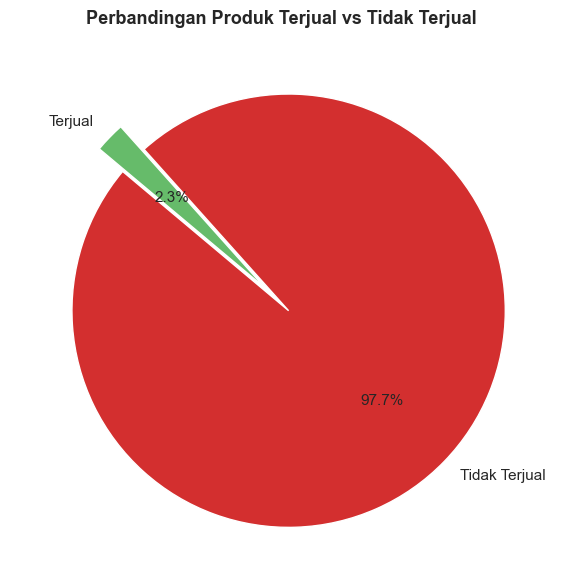

In [12]:
import matplotlib.pyplot as plt

tidak_terjual = 2590
terjual = 60

labels = ['Tidak Terjual', 'Terjual']
values = [tidak_terjual, terjual]
colors = ['#d32f2f', '#66bb6a']  # merah untuk tidak terjual, hijau untuk terjual
explode = [0.05, 0.1]  # sedikit keluarin irisan biar jelas

plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode, textprops={'fontsize': 11})
plt.title("Perbandingan Produk Terjual vs Tidak Terjual", fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

> jenis barang/ jasa

In [14]:
# Data
df["Nama Produk"].unique()

array(['LAMPU PENERANGAN JALAN UMUM', 'ALAT PENERANGAN JALAN UMUM',
       'PEMELIHARAAN PENERANGAN JALAN UMUM',
       'Penerangan Jalan Umum (PJU)', 'Lampu Penerangan Jalan Umum',
       'Penerangan Jalan Umum',
       'Penerangan Jalan Umum Konvensional (90w)',
       'Lampu LED Penerangan Jalan Umum 90 Watt',
       'Penerangan Jalan Umum Konvensional (70w)',
       'Penerangan Jalan Umum (PJU) 2x90w', 'PENERANGAN JALAN UMUM',
       'Penerangan Jalan Umum Dekoratif dan Pedestrian',
       'ALAT PENERANGAN JALAN UMUM 60 WATT',
       'Penerangan Jalan Umum Tenaga Surya (PJUTS)',
       'LAMPU LED PENERANGAN JALAN UMUM 60W',
       'Pembangunan Penerangan Jalan Umum Pipa Galvanis',
       'BOX PANEL INDUK (PHB) PENERANGAN JALAN UMUM',
       'Lampu Penerangan Jalan Umum (PJU)',
       'Lampu Penerangan Jalan Umum 60 Watt',
       'BOX PANEL PEMBAGI (PHB) PENERANGAN JALAN UMUM',
       'TIANG PJU (PENERANGAN JALAN UMUM)',
       'Lampu Penerangan Jalan Umum 90 Watt',
       'Pengadaa

> Kategori tidak terjual

In [15]:
import re
import pandas as pd

# asumsi: df sudah ada dan kolom "Nama Produk" & "Kategori Produk (pred)" ada

# 1) tampilkan jumlah "Lainnya" dan contoh (bisa di-comment kalau mau langsung assign)
lain_mask = df["Kategori Produk (pred)"] == "Lainnya"
print("Jumlah baris berlabel 'Lainnya' sebelum reassign:", lain_mask.sum())
if lain_mask.sum() > 0:
    print("\nContoh beberapa Nama Produk bertag 'Lainnya':")
    print(df.loc[lain_mask, "Nama Produk"].drop_duplicates().head(10).to_list())

# 2) daftar kata kunci tambahan untuk memastikan mapping
barang_keywords = [
    "penerangan", "lampu", "tiang", "panel", "phb", "pjuts", "pjut", "solar", "solarcell",
    "led", "lampu pju", "lpju", "apj", "pjut s", "panel pju", "box panel", "panel (phb)",
    "phb", "kabel", "tiang pju", "tiang lampu", "lampu jalan", "lampu jalan"
]
jasa_pemeliharaan_keywords = ["pemeliharaan", "perawatan", "perbaikan", "maintenance", "pemeliaharaan"]
jasa_instalasi_keywords = ["pemasangan", "pemasang", "pasang", "instalasi", "installation", "erection"]
pengadaan_keywords = ["pengadaan", "pengadaan dan pemasangan", "pengadaan & pemasangan"]

# ubah ke lower untuk pemeriksaan
def contains_any(txt, keywords):
    txt = str(txt).lower()
    return any(k in txt for k in keywords)

# 3) lakukan reassignment untuk baris yang saat ini "Lainnya"
df = df.copy()
mask = df["Kategori Produk (pred)"] == "Lainnya"
reassigned = []

for i in df[mask].index:
    name = str(df.at[i, "Nama Produk"]).lower()
    if contains_any(name, barang_keywords):
        df.at[i, "Kategori Produk (pred)"] = "Barang (Lampu/Tiang/Panel)"
        reassigned.append(("Barang", name))
    elif contains_any(name, jasa_pemeliharaan_keywords):
        df.at[i, "Kategori Produk (pred)"] = "Jasa Pemeliharaan/Perbaikan"
        reassigned.append(("Jasa Pemeliharaan/Perbaikan", name))
    elif contains_any(name, jasa_instalasi_keywords):
        df.at[i, "Kategori Produk (pred)"] = "Jasa Instalasi / Pemasangan"
        reassigned.append(("Jasa Instalasi / Pemasangan", name))
    elif contains_any(name, pengadaan_keywords):
        df.at[i, "Kategori Produk (pred)"] = "Pengadaan & Pemasangan (Barang+Jasa)"
        reassigned.append(("Pengadaan & Pemasangan (Barang+Jasa)", name))
    else:
        # fallback: assign ke Barang (karena konteks PJU dominan)
        df.at[i, "Kategori Produk (pred)"] = "Barang (Lampu/Tiang/Panel)"
        reassigned.append(("Barang (fallback)", name))

# 4) ringkasan hasil reassign
from collections import Counter
cnt = Counter([c for c,_ in reassigned])
for k,v in cnt.items():
    print(f" - {k}: {v} baris")

# 5) cek sisa (harusnya 0)
remaining = (df["Kategori Produk (pred)"] == "Lainnya").sum()

# 6) final counts per kategori
print(df["Kategori Produk (pred)"].value_counts())

# --- Opsional: jika kamu ingin drop baris yang masih 'Lainnya', uncomment baris berikut ---
# df = df[df["Kategori Produk (pred)"] != "Lainnya"].reset_index(drop=True)
# print("Baris dengan 'Lainnya' dihapus. Rows remaining:", len(df))

# Jika mau, kamu bisa meninjau contoh reassigned untuk verifikasi:
for t, name in reassigned[:5]:
    print(f" - {t}: {name}")

KeyError: 'Kategori Produk (pred)'

In [ ]:
import pandas as pd

# --- Pastikan df sudah ada dan df_kategori adalah DataFrame berisi kolom:
# 'Nama Produk' dan 'Kategori Produk (pred)' -- hasil kategorisasi

# contoh: kalau hasil kategorisasi masih di df yang sama (seperti df dari langkah sebelumnya)
# kamu bisa pakai df_kategori = df[['Nama Produk', 'Kategori Produk (pred)']].drop_duplicates()
df_kategori = df[['Nama Produk', 'Kategori Produk (pred)']].drop_duplicates()

# --- Gabungkan (match berdasarkan Nama Produk)
df = df.merge(
    df_kategori[['Nama Produk', 'Kategori Produk (pred)']],
    on='Nama Produk',
    how='left',
    suffixes=('', '_match')
)

# --- Ubah nama kolom hasil match menjadi 'Kategori Produk'
df.rename(columns={'Kategori Produk (pred)_match': 'Kategori Produk'}, inplace=True)

# --- (Opsional) Jika sebelumnya kolom 'Kategori Produk (pred)' tidak dibutuhkan lagi, bisa hapus:
# df.drop(columns=['Kategori Produk (pred)'], inplace=True)

# --- Cek hasil akhir
print("✅ Kolom 'Kategori Produk' berhasil ditambahkan ke df!")
print(df[['Nama Produk', 'Kategori Produk']].head())

# --- Ringkasan jumlah kategori
print("\nRingkasan jumlah kategori di df:")
print(df['Kategori Produk'].value_counts())

✅ Kolom 'Kategori Produk' berhasil ditambahkan ke df!
                   Nama Produk             Kategori Produk
0  LAMPU PENERANGAN JALAN UMUM  Barang (Lampu/Tiang/Panel)
1  LAMPU PENERANGAN JALAN UMUM  Barang (Lampu/Tiang/Panel)
2  LAMPU PENERANGAN JALAN UMUM  Barang (Lampu/Tiang/Panel)
3  LAMPU PENERANGAN JALAN UMUM  Barang (Lampu/Tiang/Panel)
4  LAMPU PENERANGAN JALAN UMUM  Barang (Lampu/Tiang/Panel)

Ringkasan jumlah kategori di df:
Kategori Produk
Barang (Lampu/Tiang/Panel)              2270
Paket / Set (Barang+Jasa)                184
Pengadaan & Pemasangan (Barang+Jasa)      99
Jasa Instalasi / Pemasangan               45
Jasa Pemeliharaan/Perbaikan               38
Jasa Lainnya / Pekerjaan                  14
Name: count, dtype: int64


In [ ]:
df

,Halaman,Nama Produk,Harga,Label Produk,Jenis Penyedia,Lokasi,Vendor,Jumlah Terjual,Kategori,Status Produk,URL,Jumlah_Terjual,_KategoriSimple,Kategori Produk (pred),Kategori Produk
0,1,LAMPU PENERANGAN JALAN UMUM,13737364.0,PDN,UMKK,Kota Adm. Jakarta Barat,NaN,0.0,Barang,Aktif,https://katalog.inaproc.id/solusi-klik-cerdas-...,0,Barang,Barang (Lampu/Tiang/Panel),Barang (Lampu/Tiang/Panel)
1,1,LAMPU PENERANGAN JALAN UMUM,13737364.0,PDN,UMKK,Kota Tangerang,NaN,0.0,Barang,Aktif,https://katalog.inaproc.id/cv-mulia-berkahtama...,0,Barang,Barang (Lampu/Tiang/Panel),Barang (Lampu/Tiang/Panel)
2,1,LAMPU PENERANGAN JALAN UMUM,13737364.0,PDN,UMKK,Kota Tangerang,NaN,0.0,Barang,Aktif,https://katalog.inaproc.id/solusi-klik/lampu-p...,0,Barang,Barang (Lampu/Tiang/Panel),Barang (Lampu/Tiang/Panel)
3,1,LAMPU PENERANGAN JALAN UMUM,13737364.0,PDN,UMKK,Kota Balikpapan,NaN,0.0,Barang,Aktif,https://katalog.inaproc.id/solusi-klik-tanjung...,0,Barang,Barang (Lampu/Tiang/Panel),Barang (Lampu/Tiang/Panel)
4,1,LAMPU PENERANGAN JALAN UMUM,13737364.0,PDN,UMKK,Kab. Bandung,NaN,0.0,Barang,Aktif,https://katalog.inaproc.id/solusi-klik-global/...,0,Barang,Barang (Lampu/Tiang/Panel),Barang (Lampu/Tiang/Panel)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2645,45,Jasa Instalasi Jaringan Kabel 2x10 mm2 Peneran...,0.0,PDN,UMKK,Kota Bekasi,NaN,0.0,Barang,Belum Aktif,https://katalog.inaproc.id/trica-daya/jasa-ins...,0,Barang,Jasa Instalasi / Pemasangan,Jasa Instalasi / Pemasangan
2646,45,Jasa Instalasi Jaringan Kabel NFA2X 4x16 mm2 P...,0.0,PDN,UMKK,Kota Bekasi,NaN,0.0,Barang,Belum Aktif,https://katalog.inaproc.id/trica-daya/jasa-ins...,0,Barang,Jasa Instalasi / Pemasangan,Jasa Instalasi / Pemasangan
2647,45,"LAMPU PENERANGAN JALAN UMUM DAYA INPUT 150W, L...",0.0,PDN,UMKK,Kota Tangerang,NaN,0.0,Barang,Belum Aktif,https://katalog.inaproc.id/cv-rehobot-sukses-m...,0,Barang,Barang (Lampu/Tiang/Panel),Barang (Lampu/Tiang/Panel)
2648,45,Jasa Instalasi Jaringan Kabel NFA2X 2x16 mm2 P...,0.0,PDN,UMKK,Kota Bekasi,NaN,0.0,Barang,Belum Aktif,https://katalog.inaproc.id/trica-daya/jasa-ins...,0,Barang,Jasa Instalasi / Pemasangan,Jasa Instalasi / Pemasangan


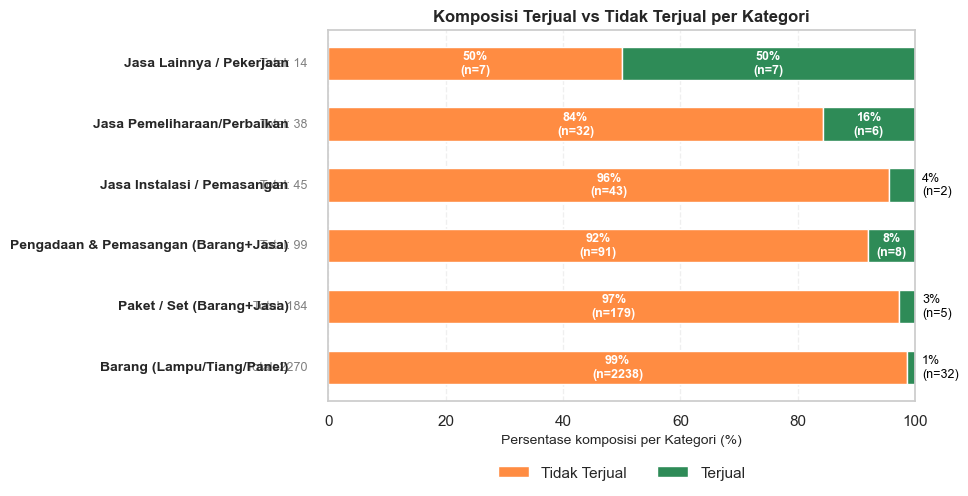

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Cek kolom kategori & jumlah terjual ---
if "Kategori Produk" in df.columns:
    cat_col = "Kategori Produk"
elif "Kategori Produk (pred)" in df.columns:
    cat_col = "Kategori Produk (pred)"
else:
    raise KeyError("Kolom kategori tidak ditemukan di df.")

if "Jumlah Terjual" not in df.columns:
    raise KeyError("Kolom 'Jumlah Terjual' tidak ditemukan di df.")

# --- Urutan kategori (sesuai permintaan) ---
categories = [
    "Barang (Lampu/Tiang/Panel)",
    "Paket / Set (Barang+Jasa)",
    "Pengadaan & Pemasangan (Barang+Jasa)",
    "Jasa Instalasi / Pemasangan",
    "Jasa Pemeliharaan/Perbaikan",
    "Jasa Lainnya / Pekerjaan",
]

# --- Hitung ringkasan ---
summary = []
for cat in categories:
    sub = df[df[cat_col] == cat]
    total = len(sub)
    terjual_n = int((sub["Jumlah Terjual"] > 0).sum())
    tidak_n  = int((sub["Jumlah Terjual"] == 0).sum())
    terjual_pct = (terjual_n / total * 100) if total > 0 else 0
    tidak_pct  = (tidak_n  / total * 100) if total > 0 else 0
    summary.append({
        "kategori": cat,
        "total": total,
        "terjual_n": terjual_n,
        "tidak_n": tidak_n,
        "terjual_pct": terjual_pct,
        "tidak_pct": tidak_pct
    })

# --- Plotting --- 
fig_h = max(3.5, 0.7 * len(categories) + 1)
fig, ax = plt.subplots(figsize=(10, fig_h))

y_pos = np.arange(len(categories))
colors = {"Terjual": "#2E8B57", "Tidak Terjual": "#FF8C42"}

# Build stacked bars
left = np.zeros(len(categories))
for col, label, c in [
    ("tidak_pct", "Tidak Terjual", colors["Tidak Terjual"]),
    ("terjual_pct", "Terjual", colors["Terjual"])
]:
    vals = [s[col] for s in summary]
    ax.barh(y_pos, vals, left=left, height=0.55, color=c, label=label, edgecolor="white")

    for j, v in enumerate(vals):
        if v <= 0: continue
        n = summary[j]["tidak_n"] if label == "Tidak Terjual" else summary[j]["terjual_n"]
        text = f"{v:.0f}%\n(n={n})"
        if v >= 8:
            ax.text(left[j] + v/2, y_pos[j], text, ha="center", va="center",
                    color="white", fontsize=9, fontweight="bold")
        else:
            ax.text(left[j] + v + 1.2, y_pos[j], text, ha="left", va="center",
                    color="black", fontsize=9)
    left += vals

# --- Tambah label kategori & total di kiri (dengan gap) ---
for idx, s in enumerate(summary):
    ax.text(-3.5, y_pos[idx], f"Total: {s['total']}", ha='right', va='center', fontsize=9, color='gray')
    ax.text(-6.8, y_pos[idx], s['kategori'], ha='right', va='center', fontsize=10, fontweight='bold')

# --- Format ---
ax.set_yticks([])
ax.set_xlim(0, 100)
ax.set_xlabel("Persentase komposisi per Kategori (%)", fontsize=10)
ax.set_title("Komposisi Terjual vs Tidak Terjual per Kategori", fontsize=12, fontweight='bold')
ax.grid(axis='x', linestyle='--', alpha=0.3)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=2, frameon=False)

plt.tight_layout()
plt.show()

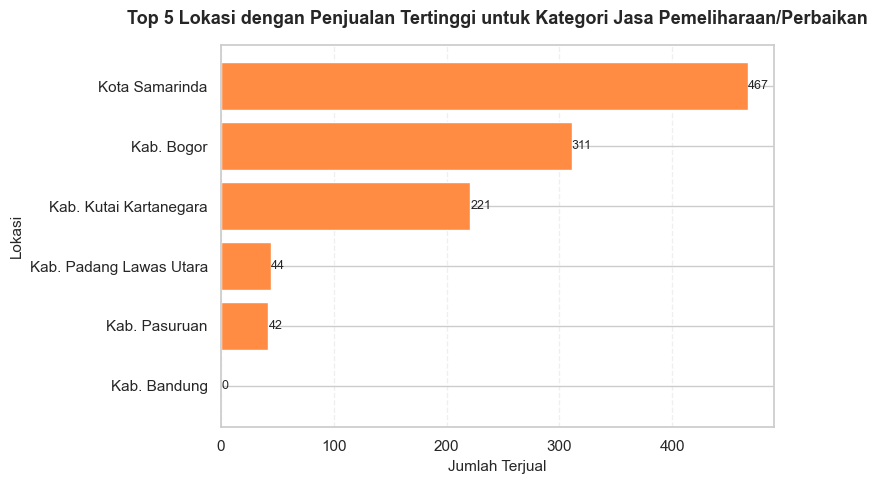

In [ ]:
if "Lokasi" not in df.columns or "Jumlah Terjual" not in df.columns or "Kategori Produk (pred)" not in df.columns:
    raise KeyError("Kolom 'Lokasi', 'Jumlah Terjual', dan 'Kategori Produk (pred)' harus ada di dataframe df.")

df_jasa = df[df["Kategori Produk (pred)"] == "Jasa Pemeliharaan/Perbaikan"]

lokasi_sales = df_jasa.groupby("Lokasi", as_index=False)["Jumlah Terjual"].sum()

# --- Ambil 5 lokasi dengan penjualan tertinggi ---
lokasi_top5 = lokasi_sales.sort_values(by="Jumlah Terjual", ascending=False).head(6)

# --- Urutkan ulang agar barh tampil dari kecil ke besar (biar bar panjang di bawah) ---
lokasi_top5 = lokasi_top5.sort_values(by="Jumlah Terjual", ascending=True)

# --- Plot horizontal bar chart ---
plt.figure(figsize=(8, 5))
bars = plt.barh(lokasi_top5["Lokasi"], lokasi_top5["Jumlah Terjual"], color="#FF8C42")

# --- Tambahkan label nilai di ujung bar ---
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.05, bar.get_y() + bar.get_height()/2,
             f"{int(width)}", va='center', fontsize=9)

# --- Format chart ---
plt.title("Top 5 Lokasi dengan Penjualan Tertinggi untuk Kategori Jasa Pemeliharaan/Perbaikan",
          fontsize=13, fontweight='bold', pad=15)
plt.xlabel("Jumlah Terjual", fontsize=11)
plt.ylabel("Lokasi", fontsize=11)
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

philip

In [18]:
import pandas as pd

# Pastikan kolom "Nama Produk" ada di df
if "Nama Produk" not in df.columns:
    raise KeyError("Kolom 'Nama Produk' tidak ditemukan di dataframe df.")

# Buat kolom baru 'philip' berdasarkan pengecekan substring
df["philip"] = df["Nama Produk"].str.contains("philip", case=False, na=False).map({True: "philip", False: "no"})

# Cek hasilnya
print(df[["Nama Produk", "philip"]].head(10))


                   Nama Produk philip
0  LAMPU PENERANGAN JALAN UMUM     no
1  LAMPU PENERANGAN JALAN UMUM     no
2  LAMPU PENERANGAN JALAN UMUM     no
3  LAMPU PENERANGAN JALAN UMUM     no
4  LAMPU PENERANGAN JALAN UMUM     no
5  LAMPU PENERANGAN JALAN UMUM     no
6  LAMPU PENERANGAN JALAN UMUM     no
7  LAMPU PENERANGAN JALAN UMUM     no
8  LAMPU PENERANGAN JALAN UMUM     no
9  LAMPU PENERANGAN JALAN UMUM     no


In [24]:
pd.set_option("display.max_columns",None)
philip = df[df["philip"]=="philip"]
philip

,Halaman,Nama Produk,Harga,Label Produk,Jenis Penyedia,Lokasi,Vendor,Jumlah Terjual,Kategori,Status Produk,URL,Jumlah_Terjual,_KategoriSimple,philip
79,2,PHILIPS LAMPU LED PENERANGAN JALAN UMUM 60W,5150000.0,PDN,UMKK,Kota Surabaya,NaN,529.0,Barang,Aktif,https://katalog.inaproc.id/master-teknologi-nu...,52900,Barang,philip
82,2,PHILIPS LAMPU LED PENERANGAN JALAN UMUM 30W,984570.0,PDN,UMKK,Kota Adm. Jakarta Timur,NaN,0.0,Barang,Aktif,https://katalog.inaproc.id/fajri-hutama-karya/...,0,Barang,philip
85,2,PHILIPS LAMPU LED PENERANGAN JALAN UMUM 60W,5716500.0,PDN,UMKK,Kab. Bandung,NaN,0.0,Barang,Aktif,https://katalog.inaproc.id/solusi-klik-global/...,0,Barang,philip
504,9,PHILIPS LAMPU LED PENERANGAN JALAN UMUM 60W,5716500.0,PDN,UMKK,Kota Medan,NaN,0.0,Barang,Aktif,https://katalog.inaproc.id/solusi-klik-medan-j...,0,Barang,philip
505,9,PHILIPS LAMPU LED PENERANGAN JALAN UMUM 60W,5716500.0,PDN,UMKK,Kota Adm. Jakarta Barat,NaN,0.0,Barang,Aktif,https://katalog.inaproc.id/solusi-klik-cerdas-...,0,Barang,philip
649,11,PHILIPS LAMPU LED PENERANGAN JALAN UMUM 60W,5716500.0,PDN,UMKK,Kota Tangerang,NaN,0.0,Barang,Aktif,https://katalog.inaproc.id/san-amerta-romora/p...,0,Barang,philip
650,11,PHILIPS LAMPU LED PENERANGAN JALAN UMUM 60W,5716500.0,PDN,UMKK,Kota Tangerang,NaN,0.0,Barang,Aktif,https://katalog.inaproc.id/cv-mulia-berkahtama...,0,Barang,philip
651,11,PHILIPS LAMPU LED PENERANGAN JALAN UMUM 60W,5716500.0,PDN,UMKK,Kota Balikpapan,NaN,0.0,Barang,Aktif,https://katalog.inaproc.id/solusi-klik-tanjung...,0,Barang,philip
652,11,PHILIPS LAMPU LED PENERANGAN JALAN UMUM 60W,5716500.0,PDN,UMKK,Kota Tangerang,NaN,0.0,Barang,Aktif,https://katalog.inaproc.id/solusi-klik/philips...,0,Barang,philip
715,12,PHILIPS LAMPU PENERANGAN JALAN UMUM (PJU) ALL ...,29201612.0,PDN,UMKK,Kota Surabaya,NaN,0.0,Barang,Aktif,https://katalog.inaproc.id/cakrawala-indo-abad...,0,Barang,philip


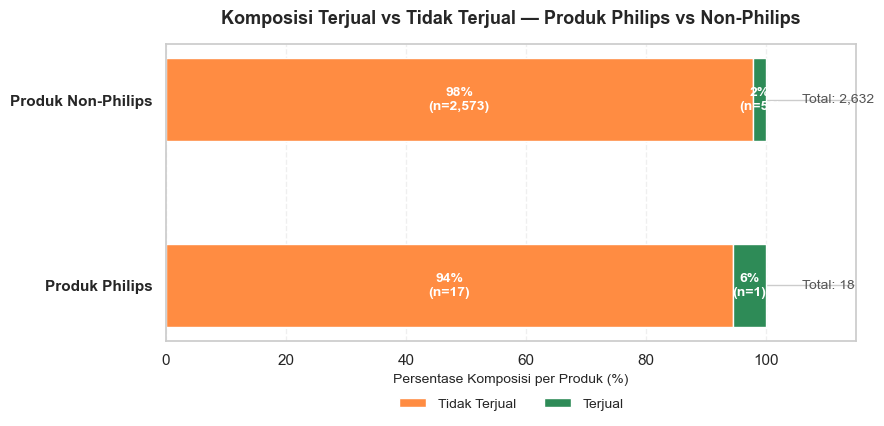

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --- Cek kolom ---
if "philip" not in d.columns or "Jumlah Terjual" not in d.columns:
    raise KeyError("d harus memiliki kolom 'philip' dan 'Jumlah Terjual'.")

# --- Buat kolom label produk dan status ---
d = d.copy()
d["Produk"] = d["philip"].map({"philip": "Produk Philips", "no": "Produk Non-Philips"})
d["Status"] = np.where(d["Jumlah Terjual"] > 0, "Terjual", "Tidak Terjual")

# --- Hitung jumlah dan persentase per kategori ---
stats = d.groupby(["Produk", "Status"]).size().unstack(fill_value=0)
stats["Total"] = stats.sum(axis=1)
stats["% Terjual"] = (stats["Terjual"] / stats["Total"]) * 100
stats["% Tidak Terjual"] = (stats["Tidak Terjual"] / stats["Total"]) * 100

# --- Data plotting ---
produk = stats.index
terjual = stats["% Terjual"].values
tidak_terjual = stats["% Tidak Terjual"].values
count_terjual = stats["Terjual"].values
count_tidak = stats["Tidak Terjual"].values
total = stats["Total"].values

# --- Plot ---
fig, ax = plt.subplots(figsize=(9, 4.5))
y = np.arange(len(produk))
height = 0.45

# --- Warna ---
color_terjual = "#2E8B57"   # hijau lembut
color_tidak = "#FF8C42"     # oranye hangat

# --- Bar chart ---
ax.barh(y, tidak_terjual, height=height, color=color_tidak, label="Tidak Terjual")
ax.barh(y, terjual, height=height, left=tidak_terjual, color=color_terjual, label="Terjual")

# --- Tambahkan anotasi ---
for i, (t, nt, ct, cnt, tot) in enumerate(zip(terjual, tidak_terjual, count_terjual, count_tidak, total)):
    # Tidak Terjual (label di tengah batang oranye)
    if nt > 0:
        ax.text(nt / 2, y[i], f"{nt:.0f}%\n(n={cnt:,})",
                ha="center", va="center", color="white", fontsize=10, fontweight="bold")

    # Terjual (label di tengah batang hijau)
    if t > 0:
        ax.text(nt + t / 2, y[i], f"{t:.0f}%\n(n={ct:,})",
                ha="center", va="center", color="white", fontsize=10, fontweight="bold")

    # Total — geser ke kanan dan sejajar
    ax.text(106, y[i], f"Total: {tot:,}",
            va="center", ha="left", fontsize=10, color="#555")

# --- Format chart ---
ax.set_yticks(y)
ax.set_yticklabels(produk, fontsize=11, fontweight="bold")
ax.set_xlim(0, 115)
ax.set_xlabel("Persentase Komposisi per Produk (%)", fontsize=10)
ax.set_title("Komposisi Terjual vs Tidak Terjual — Produk Philips vs Non-Philips",
             fontsize=13, fontweight="bold", pad=15)

# --- Tampilan bersih ---
ax.invert_yaxis()
ax.grid(axis="x", linestyle="--", alpha=0.3)
ax.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, -0.15),
    ncol=2,
    frameon=False,
    fontsize=10
)
plt.tight_layout()
plt.show()


watt

In [25]:
import re
import pandas as pd

# Pastikan df ada dan punya kolom 'Nama Produk'
if "Nama Produk" not in df.columns:
    raise KeyError("Kolom 'Nama Produk' tidak ditemukan di df")

# --- Fungsi ekstraksi watt ---
def extract_watt(nama):
    if not isinstance(nama, str) or nama.strip() == "":
        return "Tidak diketahui"

    nama = nama.lower()

    # Cari pola seperti 60w, 60 w, 60-watt, 90 watt dll
    match = re.search(r"(\d+)\s*[-]?\s*(?:w|watt)\b", nama)
    if match:
        return f"{match.group(1)}W"

    # Ada kata 'watt' tapi tanpa angka
    if "watt" in nama or re.search(r"\bw\b", nama):
        return "Lainnya"

    return "Tidak diketahui"

# --- Terapkan fungsi ke kolom baru ---
df["Watt"] = df["Nama Produk"].apply(extract_watt)

# --- Cek hasil contoh ---
print(df["Watt"].value_counts().head(10))
print("\nContoh hasil ekstraksi:")
print(df[["Nama Produk", "Watt"]].head(10))


Watt
Tidak diketahui    932
60W                604
90W                284
40W                238
120W               149
100W               125
80W                 73
30W                 63
20W                 44
50W                 30
Name: count, dtype: int64

Contoh hasil ekstraksi:
                   Nama Produk             Watt
0  LAMPU PENERANGAN JALAN UMUM  Tidak diketahui
1  LAMPU PENERANGAN JALAN UMUM  Tidak diketahui
2  LAMPU PENERANGAN JALAN UMUM  Tidak diketahui
3  LAMPU PENERANGAN JALAN UMUM  Tidak diketahui
4  LAMPU PENERANGAN JALAN UMUM  Tidak diketahui
5  LAMPU PENERANGAN JALAN UMUM  Tidak diketahui
6  LAMPU PENERANGAN JALAN UMUM  Tidak diketahui
7  LAMPU PENERANGAN JALAN UMUM  Tidak diketahui
8  LAMPU PENERANGAN JALAN UMUM  Tidak diketahui
9  LAMPU PENERANGAN JALAN UMUM  Tidak diketahui


In [27]:
df["Watt"]

0       Tidak diketahui
1       Tidak diketahui
2       Tidak diketahui
3       Tidak diketahui
4       Tidak diketahui
             ...       
2645    Tidak diketahui
2646    Tidak diketahui
2647               150W
2648    Tidak diketahui
2649               180W
Name: Watt, Length: 2650, dtype: object

In [35]:
import re
import pandas as pd
import numpy as np

# --- Cek kolom wajib ---
if "Nama Produk" not in df.columns:
    raise KeyError("Kolom 'Nama Produk' tidak ditemukan di df")

# --- Copy agar aman ---
df = df.copy()

# --- Kolom Philips vs Non-Philips ---
df["philip"] = df["Nama Produk"].fillna("").astype(str).str.lower().apply(
    lambda x: "Produk Philips" if "philip" in x else "Produk Non-Philips"
)

# --- Ekstrak kategori watt ---
def extract_watt(name):
    if not isinstance(name, str) or name.strip() == "":
        return "Tidak diketahui"
    name = name.lower()
    m = re.search(r"(\d{1,3})\s*[-]?\s*(?:w|watt)\b", name)
    if m:
        return f"{int(m.group(1))}W"
    if "watt" in name:
        return "Lainnya"
    return "Tidak diketahui"

df["Watt"] = df["Nama Produk"].apply(extract_watt)

# --- Hitung jumlah produk ---
pivot = (
    df.groupby(["Watt", "philip"])
    .size()
    .unstack(fill_value=0)
)

# Pastikan dua kolom utama selalu ada
for col in ["Produk Philips", "Produk Non-Philips"]:
    if col not in pivot.columns:
        pivot[col] = 0

# --- Hitung total dan persentase ---
pivot["Total"] = pivot["Produk Philips"] + pivot["Produk Non-Philips"]
pivot["% Philips"] = np.where(pivot["Total"] > 0, pivot["Produk Philips"] / pivot["Total"] * 100, 0)
pivot["% Non-Philips"] = np.where(pivot["Total"] > 0, pivot["Produk Non-Philips"] / pivot["Total"] * 100, 0)

# --- Urutkan watt secara logis ---
def watt_key(w):
    if w in ["Tidak diketahui", "Lainnya"]:
        return -1
    try:
        return int(re.findall(r"\d+", w)[0])
    except:
        return 9999

pivot = pivot.sort_index(key=lambda x: [watt_key(i) for i in x])

# --- Reset index agar header tidak bertingkat ---
pivot_reset = pivot.reset_index()

# --- Rapihkan nama kolom ---
pivot_reset.columns = [
    "Watt",
    "Produk Philips",
    "Produk Non-Philips",
    "Total",
    "% Philips",
    "% Non-Philips"
]

# --- Bulatkan persen ---
pivot_reset["% Philips"] = pivot_reset["% Philips"].round(1)
pivot_reset["% Non-Philips"] = pivot_reset["% Non-Philips"].round(1)

# --- 🎨 Format tabel berwarna ---
styled_table = (
    pivot_reset.style
    .format({
        "Produk Philips": "{:,.0f}",
        "Produk Non-Philips": "{:,.0f}",
        "Total": "{:,.0f}",
        "% Philips": "{:.1f}%",
        "% Non-Philips": "{:.1f}%"
    })
    .background_gradient(subset=["% Philips"], cmap="Greens")     # gradasi hijau untuk Philips
    .background_gradient(subset=["% Non-Philips"], cmap="Oranges") # gradasi oranye untuk Non-Philips
    .set_properties(**{"text-align": "center"})
    .set_table_styles([
        {"selector": "th", "props": [
            ("background-color", "#f3f3f3"),
            ("font-weight", "bold"),
            ("text-align", "center"),
            ("color", "#333"),
            ("border-bottom", "1px solid #999")
        ]},
        {"selector": "td", "props": [("border", "0.5px solid #ddd")]}
    ])
    .hide(axis="index")
)

# --- Tampilkan tabel ---
print("📊 Komposisi Produk Philips vs Non-Philips per Kategori Watt:")
display(styled_table)


📊 Komposisi Produk Philips vs Non-Philips per Kategori Watt:


Watt,Produk Philips,Produk Non-Philips,Total,% Philips,% Non-Philips
Tidak diketahui,932,0,932,0.0%,100.0%
12W,2,0,2,0.0%,100.0%
20W,44,0,44,0.0%,100.0%
30W,62,1,63,1.6%,98.4%
40W,238,0,238,0.0%,100.0%
45W,1,0,1,0.0%,100.0%
50W,30,0,30,0.0%,100.0%
55W,1,0,1,0.0%,100.0%
60W,605,8,613,1.3%,98.7%
65W,11,0,11,0.0%,100.0%


In [37]:
import re
import numpy as np
import pandas as pd

# ---------- checks ----------
if "Nama Produk" not in df.columns or "Jumlah Terjual" not in df.columns:
    raise KeyError("df harus memiliki kolom 'Nama Produk' dan 'Jumlah Terjual'")

# ---------- copy ----------
d = df.copy()

# ---------- brand (Philips / Non-Philips) ----------
d["brand"] = d["Nama Produk"].fillna("").astype(str).str.lower().apply(
    lambda s: "Produk Philips" if "philip" in s else "Produk Non-Philips"
)

# ---------- extract watt ----------
def extract_watt(name):
    if not isinstance(name, str) or name.strip() == "":
        return "Tidak diketahui"
    s = name.lower()
    m = re.search(r"(\d{1,3})\s*[-]?\s*(?:w|watt)\b", s)
    if m:
        return f"{int(m.group(1))}W"
    # beberapa teks menyebut "pjuts", "pju" dll tanpa angka -> treat as Tidak diketahui
    return "Tidak diketahui"

d["Watt"] = d["Nama Produk"].apply(extract_watt)

# ---------- status terjual ----------
d["Status"] = np.where(d["Jumlah Terjual"] > 0, "Terjual", "Tidak Terjual")

# ---------- pivot counts per (Watt, brand, Status) ----------
p = d.groupby(["Watt", "brand", "Status"]).size().unstack(fill_value=0)

# ensure both Status columns exist
for st in ["Terjual", "Tidak Terjual"]:
    if st not in p.columns:
        p[st] = 0

# ---------- flatten to one table with columns per brand ----------
# We'll build rows per Watt, with counts and percentages for each brand
rows = []
watt_order = sorted(p.index.get_level_values(0).unique(), key=lambda w: (0 if w=="Tidak diketahui" else int(re.findall(r"\d+", w)[0])) )

for w in watt_order:
    row = {"Watt": w}
    for brand in ["Produk Philips", "Produk Non-Philips"]:
        # get counts for this (w,brand)
        try:
            counts = p.loc[(w, brand)]
            terjual_cnt = int(counts.get("Terjual", 0))
            tidak_cnt  = int(counts.get("Tidak Terjual", 0))
        except KeyError:
            terjual_cnt = 0
            tidak_cnt = 0
        total = terjual_cnt + tidak_cnt
        pct_terjual = (terjual_cnt / total * 100) if total>0 else 0.0
        pct_tidak   = (tidak_cnt / total * 100) if total>0 else 0.0

        # store numeric columns
        row[f"{brand} - Terjual (n)"] = terjual_cnt
        row[f"{brand} - Tidak Terjual (n)"] = tidak_cnt
        row[f"{brand} - Total"] = total
        row[f"{brand} - % Terjual"] = round(pct_terjual,1)
        row[f"{brand} - % Tidak Terjual"] = round(pct_tidak,1)
    rows.append(row)

result = pd.DataFrame(rows)

# ---------- optional: reorder columns nicely ----------
cols = ["Watt"]
for brand in ["Produk Philips", "Produk Non-Philips"]:
    cols += [
        f"{brand} - Terjual (n)",
        f"{brand} - Tidak Terjual (n)",
        f"{brand} - Total",
        f"{brand} - % Terjual",
        f"{brand} - % Tidak Terjual",
    ]
result = result[cols]

# ---------- format display columns (n and percent) for readability ----------
# create a display dataframe with "n (x%)" style for counts and percentages
disp = result.copy()
for brand in ["Produk Philips", "Produk Non-Philips"]:
    disp[f"{brand} Terjual"] = disp.apply(
        lambda r: f"{int(r[f'{brand} - Terjual (n)']):,} ({r[f'{brand} - % Terjual']:.1f}%)", axis=1
    )
    disp[f"{brand} Tidak Terjual"] = disp.apply(
        lambda r: f"{int(r[f'{brand} - Tidak Terjual (n)']):,} ({r[f'{brand} - % Tidak Terjual']:.1f}%)", axis=1
    )
    disp[f"{brand} Total"] = disp[f"{brand} - Total"].map("{:,.0f}".format)

# keep only friendly columns
final = disp[["Watt",
              "Produk Philips Terjual", "Produk Philips Tidak Terjual", "Produk Philips Total",
              "Produk Non-Philips Terjual", "Produk Non-Philips Tidak Terjual", "Produk Non-Philips Total"
             ]].copy()

# ---------- style the table ----------
styled = (final.style
          .set_table_styles([
              {"selector": "th", "props": [("background-color", "#f3f3f3"),
                                          ("font-weight", "bold"),
                                          ("text-align", "center")]},
              {"selector": "td", "props": [("text-align", "center")]}])
          .applymap(lambda v: "background-color: #dff0d8" if "Produk Philips Terjual" in v else "")
         )

# if running in notebook, display styled table:
print("Tabel komposisi per Watt (Philips vs Non-Philips) — format: jumlah (persen)")
display(final.style
        .set_properties(**{"text-align": "center"})
        .set_table_styles([{"selector":"th","props":[("background-color","#f3f3f3"),("font-weight","bold")]}])
       )

# also keep 'result' dataframe (numeric) if you want to export or further process
result_numeric = result.copy()



Tabel komposisi per Watt (Philips vs Non-Philips) — format: jumlah (persen)


C:\Users\nalin\AppData\Local\Temp\ipykernel_17536\2601984459.py:108: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(lambda v: "background-color: #dff0d8" if "Produk Philips Terjual" in v else "")


,Watt,Produk Philips Terjual,Produk Philips Tidak Terjual,Produk Philips Total,Produk Non-Philips Terjual,Produk Non-Philips Tidak Terjual,Produk Non-Philips Total
0,Tidak diketahui,0 (0.0%),0 (0.0%),0,37 (4.0%),895 (96.0%),932
1,12W,0 (0.0%),0 (0.0%),0,0 (0.0%),2 (100.0%),2
2,20W,0 (0.0%),0 (0.0%),0,4 (9.1%),40 (90.9%),44
3,30W,0 (0.0%),1 (100.0%),1,3 (4.8%),59 (95.2%),62
4,40W,0 (0.0%),0 (0.0%),0,1 (0.4%),237 (99.6%),238
5,45W,0 (0.0%),0 (0.0%),0,0 (0.0%),1 (100.0%),1
6,50W,0 (0.0%),0 (0.0%),0,1 (3.3%),29 (96.7%),30
7,55W,0 (0.0%),0 (0.0%),0,0 (0.0%),1 (100.0%),1
8,60W,1 (12.5%),7 (87.5%),8,2 (0.3%),603 (99.7%),605
9,65W,0 (0.0%),0 (0.0%),0,1 (9.1%),10 (90.9%),11


#### statdesc

In [ ]:
apj = pd.read_excel("data.xlsx", sheet_name="1")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Baca data ---
# df = pd.read_excel("namafile.xlsx", sheet_name="1")

# --- Agregasi total harga dan jumlah terjual per lokasi ---
agg = df.groupby("Lokasi").agg({
    "Jumlah Terjual": "mean",
    "Harga": "sum"
}).sort_values("Harga", ascending=False)

# --- Ambil hanya 15 lokasi teratas agar tidak padat ---
agg_top = agg.head(15)

# --- Buat horizontal bar chart ---
plt.figure(figsize=(10, 6))
bars = plt.barh(agg_top.index, agg_top["Harga"], color="#f9a825")

# --- Tambahkan anotasi jumlah barang terjual di ujung bar ---
for i, (jumlah, total) in enumerate(zip(agg_top["Jumlah Terjual"], agg_top["Harga"])):
    plt.text(total, i, f"{jumlah:.0f}", va='center', ha='left', fontsize=9, fontweight='bold')

# --- Label dan judul ---
plt.xlabel("Total Harga (Rp)")
plt.ylabel("Lokasi")
plt.title("Top 15 Lokasi dengan Total Harga Tertinggi dan Jumlah Barang Terjual")

# --- Rapiin tampilan ---
plt.gca().invert_yaxis()  # biar bar terbesar di atas
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Baca data ---
# df = pd.read_excel("namafile.xlsx", sheet_name="1")

# --- Agregasi total harga dan jumlah terjual per lokasi ---
agg = df.groupby("Lokasi").agg({
    "Jumlah Terjual": "mean",
    "Harga": "sum"
}).sort_values("Harga", ascending=True)  # ⬅️ ascending=True agar ambil yang TERENDAH

# --- Ambil hanya 15 lokasi terendah ---
agg_bottom = agg.head(15)

# --- Buat horizontal bar chart ---
plt.figure(figsize=(10, 6))
bars = plt.barh(agg_bottom.index, agg_bottom["Harga"], color="#6baed6")  # warna biru lembut

# --- Tambahkan anotasi jumlah barang terjual di ujung bar ---
for i, (jumlah, total) in enumerate(zip(agg_bottom["Jumlah Terjual"], agg_bottom["Harga"])):
    plt.text(total, i, f"{jumlah:.0f}", va='center', ha='left', fontsize=9, fontweight='bold')

# --- Label dan judul ---
plt.xlabel("Total Harga (Rp)")
plt.ylabel("Lokasi")
plt.title("Top 15 Lokasi dengan Total Harga Terendah dan Jumlah Barang Terjual")

# --- Rapiin tampilan ---
plt.tight_layout()
plt.show()


In [ ]:
d_ori

In [ ]:
print("\n--- 2A. Analisis Persaingan & Pricing ---")

# Harga Rata-rata per Kategori Produk
avg_price_by_category = df.groupby('Kategori')['Harga'].agg(['mean', 'median', 'min', 'max'])
avg_price_by_category = avg_price_by_category.sort_values(by='mean', ascending=False).round(2)

print("\n**Rata-rata Harga Jual per Kategori Produk:**")
display(avg_price_by_category)

# Spread Harga: Perbandingan Harga Rata-rata UMKM vs Perusahaan Besar
price_spread_by_type = df.groupby('Jenis Penyedia')['Harga'].mean().round(2)

print("\n**Rata-rata Harga Berdasarkan Jenis Penyedia:**")
display(price_spread_by_type)

# Contoh: Identifikasi Produk dengan Harga Outlier (Harga Terlalu Rendah)
# Pilih kategori dengan penjualan tinggi (misal 'Elektronik')
target_category = 'Barang' # Ganti dengan Kategori yang relevan di data Anda
category_data = df[df['Kategori'] == target_category]

# Hitung kuartil pertama (Q1)
Q1 = category_data['Harga'].quantile(0.25)
outlier_threshold = Q1 * 0.5 # Contoh: produk yang harganya kurang dari 50% Q1

low_price_outliers = category_data[category_data['Harga'] < outlier_threshold][
    ['Nama Produk', 'Harga', 'Jumlah_Terjual']
].sort_values(by='Harga')

print(f"\n**Produk di Kategori '{target_category}' dengan Harga Sangat Rendah (Potensi Promosi/Kontrol Kualitas):**")
display(low_price_outliers.head(5))

In [ ]:
print("\n--- 2B. Segmentasi Vendor & Analisis Penjualan ---")

# Distribusi Produk & Dominasi Penjualan berdasarkan Jenis Penyedia
vendor_segmentation = df.groupby('Jenis Penyedia').agg(
    Jumlah_Produk=('Nama Produk', 'count'),
    Total_Unit_Terjual=('Jumlah_Terjual', 'sum'),
    Rata_Rata_Penjualan_per_Produk=('Jumlah_Terjual', 'mean')
).sort_values(by='Total_Unit_Terjual', ascending=False).round(2)

# Menghitung persentase kontribusi
vendor_segmentation['Persentase_Produk'] = (vendor_segmentation['Jumlah_Produk'] / vendor_segmentation['Jumlah_Produk'].sum()) * 100
vendor_segmentation['Persentase_Penjualan'] = (vendor_segmentation['Total_Unit_Terjual'] / vendor_segmentation['Total_Unit_Terjual'].sum()) * 100

print("\n**Analisis Dominasi Pasar Berdasarkan Jenis Penyedia:**")
print(vendor_segmentation)

# Identifikasi Vendor Terlaris (Top N)
top_n = 10
top_vendors = df.groupby('Jenis Penyedia').agg( # Changed from 'Vendor' to 'Jenis Penyedia' based on available columns and previous analysis
    Total_Unit_Terjual=('Jumlah_Terjual', 'sum'),
    Jumlah_Produk=('Nama Produk', 'count')
).sort_values(by='Total_Unit_Terjual', ascending=False)

print(f"\n**Top {top_n} Jenis Penyedia Berdasarkan Total Unit Terjual (Kemitraan Strategis):**") # Changed Vendor to Jenis Penyedia
print(top_vendors.head(top_n))

Visualisasi


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

10 Produk Terlaris

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Hitung top 10 produk terlaris ---
top_produk = df_cleaned.groupby('Nama Produk')['Jumlah Terjual'].sum().nlargest(10)

# --- Plot ---
plt.figure(figsize=(10,6))
ax = sns.barplot(x=top_produk.values, y=top_produk.index, color="#1f77b4")

# --- Tambahkan anotasi nilai jumlah terjual di ujung bar ---
for i, v in enumerate(top_produk.values):
    ax.text(v, i, f"{v:,.0f}", va='center', ha='left', fontsize=9, fontweight='bold', color='black')

# --- Label dan judul ---
plt.title("Top 10 Produk Terlaris", fontsize=12, weight='bold')
plt.xlabel("Jumlah Terjual")
plt.ylabel("Nama Produk")

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

# --- Filter produk yang mengandung kata "pemeliharaan" dan "penerangan" di mana pun dalam teks ---
mask = df["Nama Produk"].str.contains(r"pemeliharaan", case=False, na=False) & \
       df["Nama Produk"].str.contains(r"penerangan", case=False, na=False)
df_pemeliharaan = df[mask]

# --- Hitung total penjualan per lokasi ---
lokasi_pemeliharaan = (
    df_pemeliharaan.groupby("Lokasi")["Jumlah Terjual"]
    .sum()
    .sort_values(ascending=False)
)

# --- Tampilkan daftar lokasi dan jumlah terjual ---
print("📍 Lokasi yang menjual produk mengandung kata 'pemeliharaan' dan 'penerangan':\n")
display(lokasi_pemeliharaan)

# --- Visualisasi ---
plt.figure(figsize=(10, len(lokasi_pemeliharaan) * 0.3))
ax = sns.barplot(x=lokasi_pemeliharaan.values, y=lokasi_pemeliharaan.index, palette="crest")

# --- Tambahkan anotasi jumlah di ujung bar ---
for i, v in enumerate(lokasi_pemeliharaan.values):
    ax.text(v, i, f"{v:,.0f}", va='center', ha='left', fontsize=9, fontweight='bold', color='black')

# --- Label dan judul ---
plt.xlabel("Jumlah Terjual")
plt.ylabel("Lokasi")

plt.tight_layout()
plt.show()


10 Daerah paling Banyak Terjual

In [ ]:
top_vendor = df_cleaned.groupby('Lokasi')['Jumlah_Terjual'].sum().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_vendor.values, y=top_vendor.index)
plt.title("Top 10 Lokasi dengan Penjualan Tertinggi")
plt.xlabel("Total Terjual")
plt.ylabel("Vendor")
plt.tight_layout()
plt.show()

Membuat promosi lokal di area yang memiliki permintaan tinggi

Harga dengan Jumlah Terjual

In [ ]:
#Unik Label produk
unik_label = df['Label Produk'].unique()
unik_label

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_cleaned, x='Harga', y='Jumlah_Terjual', hue='Label Produk', alpha=0.7)
plt.title("Hubungan Harga dan Jumlah Terjual")
plt.xlabel("Harga Produk (Rp)")
plt.ylabel("Jumlah Terjual")
plt.tight_layout()
plt.show()


In [ ]:
#Kota Surabaya saja
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asumsi: df_cleaned adalah DataFrame Anda yang sudah bersih
# Asumsi: Kolom lokasi sudah diekstrak dan diberi nama 'Lokasi'.
# Asumsi: Kolom 'Harga' dan 'Jumlah Terjual' sudah numerik.

# 1. Filtering Data khusus Surabaya
# Buat DataFrame baru yang hanya berisi data di mana kolom 'Lokasi' adalah 'Surabaya'
df_surabaya = df_cleaned[df_cleaned['Lokasi'].str.contains('Surabaya', case=False, na=False)].copy()

print(f"✅ Data berhasil difilter. Total produk di Surabaya: {len(df_surabaya)}.")

# 2. Visualisasi Scatterplot untuk Surabaya
plt.figure(figsize=(7,5))

# Plot data yang sudah difilter
sns.scatterplot(data=df_surabaya,
                x='Harga',
                y='Jumlah Terjual', # Menggunakan 'Jumlah Terjual' sesuai penamaan kolom terakhir Anda
                hue='Label Produk',
                alpha=0.7)

plt.title("Hubungan Harga dan Jumlah Terjual di Surabaya", fontsize=14)
plt.xlabel("Harga Produk (Rp)", fontsize=12)
plt.ylabel("Jumlah Terjual", fontsize=12)
plt.tight_layout()
plt.show()
#

Range Harga untuk Top 10 yang paling banyak terjual

In [ ]:
unik_nama = df_cleaned['Nama Produk'].unique()
print(len(unik_nama))

In [ ]:
# 1️⃣ Cari top 10 produk dengan penjualan terbanyak
top_produk = (
    df_cleaned.groupby('Nama Produk')['Jumlah Terjual']
    .sum()
    .nlargest(10)
    .index
)

# 2️⃣ Filter data untuk hanya produk terlaris
df_top = df_cleaned[df_cleaned['Nama Produk'].isin(top_produk)]

# 3️⃣ Hitung range harga (min & max) tiap produk
range_harga = (
    df_top.groupby('Nama Produk')['Harga']
    .agg(['min', 'max'])
    .reset_index()
    .rename(columns={'min': 'Harga Minimum', 'max': 'Harga Maksimum'})
)

range_harga


Perbandingan Berdasarkan Status Produk

In [ ]:
penjualan_status = df_cleaned.groupby('Status Produk')['Jumlah Terjual'].sum().reset_index()
print(penjualan_status)


Produk Aktif memberikan kontribusi penjualan yang lebih besar, menandakan bahwa ketersediaan stok berperan penting dalam meningkatkan penjualan. Oleh karena itu, manajemen inventory yang baik diperlukan agar produk selalu tersedia.

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_cleaned, x='Harga', y='Jumlah_Terjual', hue='Status Produk', alpha=0.7)
plt.title("Hubungan Harga dan Jumlah Terjual")
plt.xlabel("Harga Produk (Rp)")
plt.ylabel("Jumlah Terjual")
plt.tight_layout()
plt.show()
